<a href="https://colab.research.google.com/github/leeolney/data_portfolio/blob/main/women_entrepreneurship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Women Entrepreneurship: Data visualization and Non-parametric Testing

This notebook uses the [Women Entrepreneurship and Labor Force](https://www.kaggle.com/babyoda/women-entrepreneurship-and-labor-force) dataset. The [Task](https://www.kaggle.com/babyoda/women-entrepreneurship-and-labor-force/tasks?taskId=2742) is to examine whether the 2015 Women's Entrepreneurship Index and Global Entrepreneurship Index show a significant difference between OECD countries that are members of the European Union and not, as well as to determine the significance of the relationship between the indexes.


The objective of this exercise is to learn and practice interactive plots and statistical testing in Python.

These are the notebook references used in this exercise: 
* [Women Entrepreneurship](https://www.kaggle.com/gabriellapauline/women-entrepreneurship)
* [Women Entrepreneurship EDA & Regression](https://www.kaggle.com/dabawse/women-entrepreneurship-eda-regression)
* [Women Entrepreneurship - Visual Analytics](https://www.kaggle.com/docxian/women-entrepreneurship-visual-analytics)
* [WES Visualisation + Non Parametric testing](https://www.kaggle.com/chaudharypriyanshu/wes-visualisation-non-parametric-testing)



## Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import packages and data

In [ ]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import boxcox
from collections import Counter

In [ ]:
# import data
path = "/content/drive/MyDrive/data/women_entrepreneurship.csv"
data = pd.read_csv(path, sep=';')

In [ ]:
data.shape

(51, 9)

In [ ]:
data.head()

,No,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
0,4,Austria,Developed,Member,Euro,54.9,64.9,0.90,67.1
1,6,Belgium,Developed,Member,Euro,63.6,65.5,0.60,58.0
2,17,Estonia,Developed,Member,Euro,55.4,60.2,-0.88,68.5
3,18,Finland,Developed,Member,Euro,66.4,65.7,-0.20,67.7
4,19,France,Developed,Member,Euro,68.8,67.3,0.00,60.6


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   No                                     51 non-null     int64  
 1   Country                                51 non-null     object 
 2   Level of development                   51 non-null     object 
 3   European Union Membership              51 non-null     object 
 4   Currency                               51 non-null     object 
 5   Women Entrepreneurship Index           51 non-null     float64
 6   Entrepreneurship Index                 51 non-null     float64
 7   Inflation rate                         51 non-null     float64
 8   Female Labor Force Participation Rate  51 non-null     float64
dtypes: float64(4), int64(1), object(4)
memory usage: 3.7+ KB


## Visualizations

### Binary variables

In [ ]:
# function
def bar_charts(col, title, x, y, colour='slategray'):
    count = Counter(data[col])
    bars = plt.bar(count.keys(), count.values(), color=colour)

    for bar in bars:
        score = list(count.values())[bars.index(bar)]
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height, score, ha='center', va='bottom')

    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

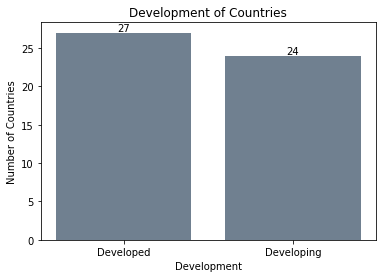

In [ ]:
# level of development 
bar_charts('Level of development', 'Development of Countries', 'Development', 'Number of Countries')

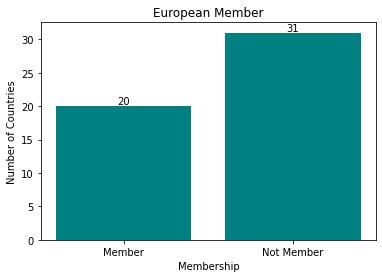

In [ ]:
bar_charts('European Union Membership', 'European Member', 'Membership', 'Number of Countries', "teal")

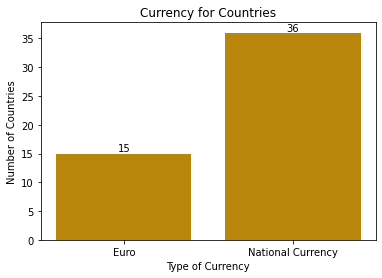

In [ ]:
bar_charts('Currency', 'Currency for Countries', 'Type of Currency', 'Number of Countries',"darkgoldenrod")

### Numeric variables 

In [ ]:
numerical = data[['Women Entrepreneurship Index', 'Entrepreneurship Index', 'Inflation rate', 'Female Labor Force Participation Rate']]

#summary 
numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
Women Entrepreneurship Index,51.0,47.835294,14.268480,25.30,36.35,44.5,59.15,74.8
Entrepreneurship Index,51.0,47.241176,16.193149,24.80,31.90,42.7,65.40,77.6
Inflation rate,51.0,2.587647,5.380639,-2.25,-0.50,0.6,3.60,26.5
Female Labor Force Participation Rate,51.0,58.481765,13.864567,13.00,55.80,61.0,67.40,82.3


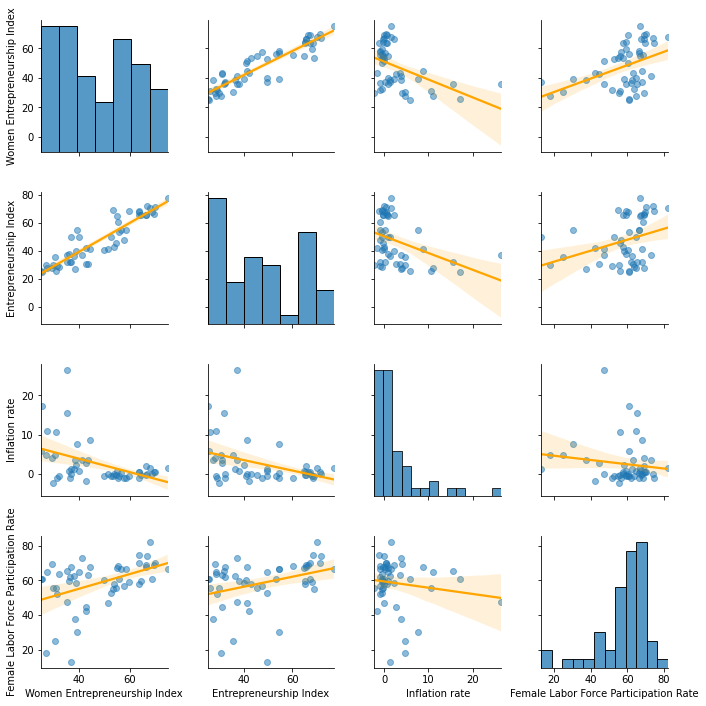

In [ ]:
#pair plot
sns.pairplot(numerical, kind='reg', plot_kws={'line_kws':{'color':'orange'}, 'scatter_kws': {'alpha': 0.5}})
plt.show()

### Correlation

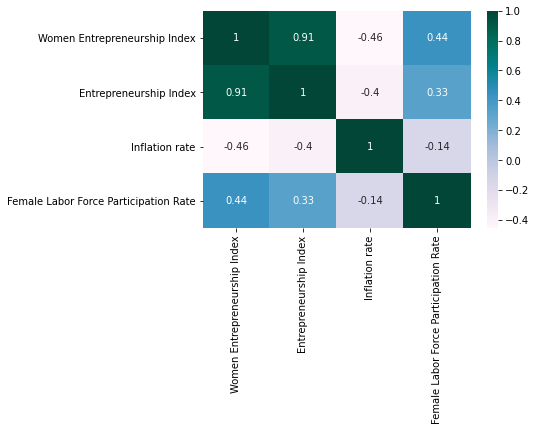

In [ ]:
# pearson
sns.heatmap(numerical.corr(method='pearson'), annot=True, cmap=plt.cm.PuBuGn)
plt.show()

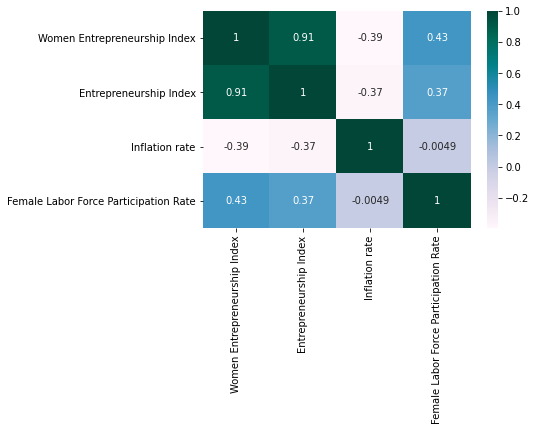

In [ ]:
# spearman
sns.heatmap(numerical.corr(method='spearman'), annot=True, cmap=plt.cm.PuBuGn)
plt.show()

### WEI and Entrepreneurship Index

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



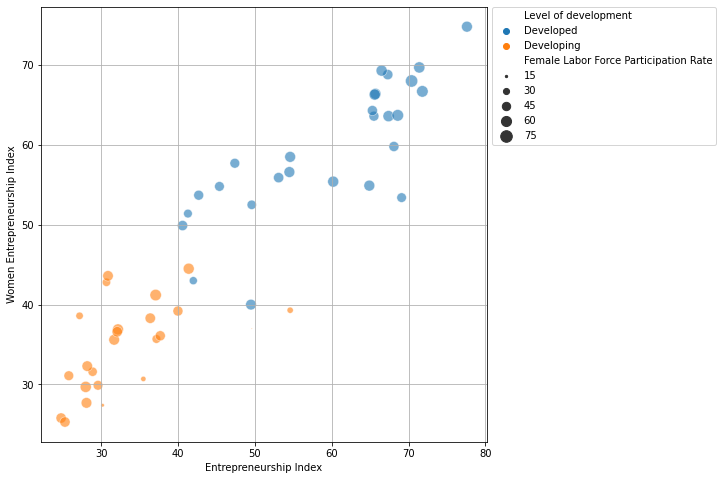

In [ ]:
plt.rcParams['figure.figsize']=(8,8)
sns.scatterplot(data['Entrepreneurship Index'], data['Women Entrepreneurship Index'],
                hue = data['Level of development'],
                size = data['Female Labor Force Participation Rate'],
                sizes = (1,150),
                alpha = 0.6)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0) 
plt.grid()
plt.show()

In [ ]:
fig = px.scatter(data,x="Women Entrepreneurship Index", y="Entrepreneurship Index",color="European Union Membership",
                 size="Female Labor Force Participation Rate", template="simple_white",hover_data=['Country'],
                 width=900, height=500)
fig.show()

* European Union Members have a relatively higher WEI and Entrepreneurship Index than non-members.
* Australia has the highest WEI and Entrepreneurship Index among all members and non-members countries. 

### WEI and Inflation Rate

In [ ]:
fig = px.scatter(data,x="Women Entrepreneurship Index", y="Inflation rate",color="European Union Membership",
                 size="Women Entrepreneurship Index", template="simple_white",hover_data=['Country'],
                marginal_y="violin",marginal_x="box",trendline='ols', trendline_color_override='lightgreen',width=950, height=650)
fig.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



* Non-European union member countries have a larger range of inflation rate than European union member
  * European union members inflation rate are between -1.7 (Greece) and 0.9 (Austria)

* El Salvador has the lowest Inflation Rate of -2.25 among non-european union members and both membership groups
* Argentina has the highest Inflation Rate of 26.5 among non-european unionmembers an dboth membership groups. 


### WEI and Female Labor Force Participation Rate

In [ ]:
fig = px.scatter(data,x="Women Entrepreneurship Index", y="Female Labor Force Participation Rate",color="European Union Membership",
                 size="Women Entrepreneurship Index", template="simple_white",hover_data=['Country'],
                marginal_y="violin",marginal_x="box",trendline='ols', trendline_color_override='lightgreen',width=900, height=600)
fig.show()

 * Countries with a high WEI tends to have a high Female Labor Force Participation Rate (FLFPR)
 * There are no member countries with FLFPR below 40 while there are 5 non-member countries with FLFPR below 40.
 * Iceland has the highest FLFPR at 82.3 in the non-members group and across both groups.
 * Greece has the lowest FLFPR at 42.5 among the members group
 * Saudi Arabia has lowest FLFPR among non-members and across both groups at 13. 
 

### WEI and Currency

In [ ]:
fig = px.violin(data, y="Women Entrepreneurship Index", x="Currency", color="Level of development", box=True, points="all",
          hover_data=data.columns, width=800, height=500, template="simple_white")
fig.show()

* Developed countries have a relatively higher WEI than developing countries, also the range of WEI in developed countries is larger than developing countries.  

### Differences between WEI and Entrepreneurship Index 

a) Developed and developing countries

b) Developing_non_members, developed_member and developed_non_members

In [ ]:
# part a
# Delta index: differences between WEI and Entrepreneurship Index
data['Delta Index'] = data['Women Entrepreneurship Index'] - data['Entrepreneurship Index']
data_stats_DeltaInd = data.groupby('Level of development', as_index=False).agg(
    mean_DeltaInd = pd.NamedAgg(column='Delta Index', aggfunc=np.mean),
    min_DeltaInd = pd.NamedAgg(column='Delta Index', aggfunc=np.min),
    median_DeltaInd = pd.NamedAgg(column='Delta Index', aggfunc=np.median),
    max_DeltaInd = pd.NamedAgg(column='Delta Index', aggfunc=np.max))
data_stats_DeltaInd

,Level of development,mean_DeltaInd,min_DeltaInd,median_DeltaInd,max_DeltaInd
0,Developed,-0.125926,-15.7,0.7,11.0
1,Developing,1.404167,-15.3,1.8,12.7


In [ ]:
fig = px.violin(data, y="Delta Index", x="Level of development", color="Level of development", box=True, points="all",
          hover_data=data.columns, width=700, height=500, template="simple_white")
fig.show()

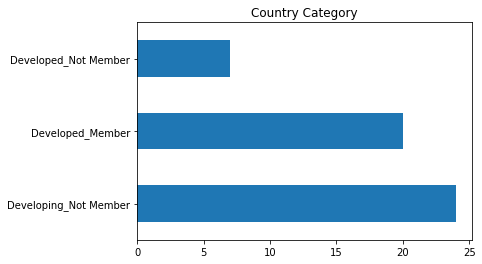

In [ ]:
# part b
data['CountryCategory'] = data['Level of development'] + '_' + data['European Union Membership']
# plot frequencies 
plt.rcParams['figure.figsize']=(6,4)
data.CountryCategory.value_counts().plot(kind='barh')
plt.title('Country Category')
plt.show()

In [ ]:
# Delta index 
data_stats_DeltaInd = data.groupby('CountryCategory', as_index=False).agg(
    mean_DeltaInd = pd.NamedAgg(column='Delta Index', aggfunc=np.mean),
    min_DeltaInd = pd.NamedAgg(column='Delta Index', aggfunc=np.min),
    median_DeltaInd = pd.NamedAgg(column='Delta Index', aggfunc=np.median),
    max_DeltaInd = pd.NamedAgg(column='Delta Index', aggfunc=np.max))
data_stats_DeltaInd

,CountryCategory,mean_DeltaInd,min_DeltaInd,median_DeltaInd,max_DeltaInd
0,Developed_Member,1.975000,-10.0,1.8,11.0
1,Developed_Not Member,-6.128571,-15.7,-4.9,0.7
2,Developing_Not Member,1.404167,-15.3,1.8,12.7


In [ ]:
fig = px.violin(data, y="Delta Index", x="CountryCategory", color="CountryCategory", box=True, points="all",
          hover_data=data.columns, width=700, height=500, template="simple_white")
fig.show()

* While there are not much difference between the delta index of developed and developing countries, there are some differences between developed member, developed non-member and developing non-member groups. 
* Developed non-members countries have a lower median delta index than developed member and developing non member countries. 

### Distribution with various transformations

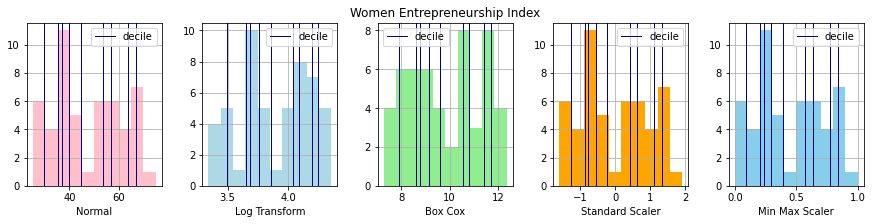

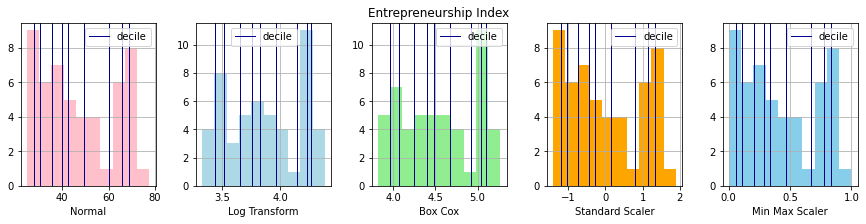

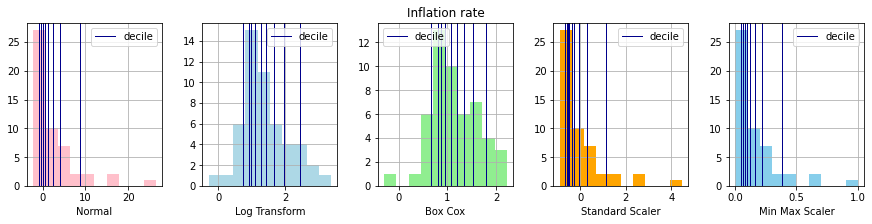

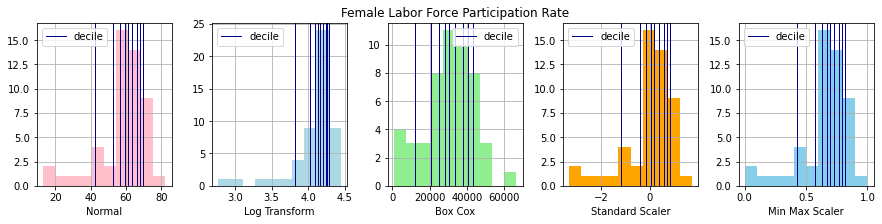

In [ ]:

for col in numerical:
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))
    
    f1 = data[col]
    f2 = (data[col]+3).transform(np.log)
    f3 = pd.DataFrame(boxcox(data[col]+3)[0])
    f4 = pd.DataFrame(StandardScaler().fit_transform(np.array(data[col]).reshape(-1, 1)))
    f5 = pd.DataFrame(MinMaxScaler().fit_transform(np.array(data[col]).reshape(-1, 1)))
    
    for column in [[f1, axes[0], 'pink', 'Normal'], [f2, axes[1], 'lightblue', 'Log Transform'], 
                    [f3, axes[2], 'lightgreen', 'Box Cox'], [f4, axes[3], 'orange', 'Standard Scaler'], 
                    [f5, axes[4], 'skyblue', 'Min Max Scaler']]:
        feature = column[0]
        ax = column[1]
        colour = column[2]
        name = column[3]
        
        feature.hist(ax=ax, color=colour)
        ax.set_xlabel(name)
        
        deciles = feature.quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
        for pos in np.array(deciles).reshape(1, -1)[0]:
            handle = ax.axvline(pos, color='darkblue', linewidth=1)
        ax.legend([handle], ['decile'])
        
    axes[2].set_title(col)
    axes[3].set_title('')
    axes[4].set_title('')
    
    plt.show()

## Non parametric tests

### Question 1

Are European Union membership variable and development variable independent from each other? (Method Chi-Square Test and Crosstab)

Chi-square test

H0: There is no association between European Union membership and the level development of the country

H1: There is an association between European Union membership and the level development of the country

In [ ]:
data = pd.read_csv(path, sep=';')
contingency = pd.crosstab(data['European Union Membership'],data['Level of development'])
contingency

Level of development,Developed,Developing
European Union Membership,,
Member,20,0
Not Member,7,24


In [ ]:
# set correlation to true as there are no developing countries with EU membership
chisq,p,df,expected = st.chi2_contingency(contingency,correction=True)
print(f'Chi-squared: {chisq}')
print(f'p-value: {p}')
print(f'degrees of freedom: {df}')

Chi-squared: 26.222328629032262
p-value: 3.042837837948524e-07
degrees of freedom: 1


There is an association between  European Union Membership and countries Level of Development  as p-value is <0.05. 

In [ ]:
contingency-expected

Level of development,Developed,Developing
European Union Membership,,
Member,9.411765,-9.411765
Not Member,-9.411765,9.411765


The difference between observed and expected records between European Union Membership and Level of Development suggests that members tend to be developed countries and vice versa. 

### Question 2

Do the Women Entrepreneurship Index and Global Entrepreneurship Index values show a statistically significant difference between the countries that are members of the European Union and not? (Method Mann-Whitney U)

 
* Women Entrepreneurship Index:   
  * H0: The population average of Women Entrepreneurship Index for European Union members are equal to non-members.    
  * H1: The population average of Women Entrepreneurship Index for European Union members are not equal to non-members

* Entrepreneurship Index:  
  * H0: The population average of Entrepreneurship Index for European Union members are equal to non-members.  
  * H1: The population average of Entrepreneurship Index for European Union members are not equal to non-members

In [ ]:
data['European Union Membership'].value_counts()

Not Member    31
Member        20
Name: European Union Membership, dtype: int64

* The Central Limit Theorem is not satisfied as there are less than 30 members in the European Union hence, t-test will be used instead of z-test.
* If normality assumption and equal variance assumption are not met, the non-parametric version of t-test should be used. 

#### Normal distribution tests

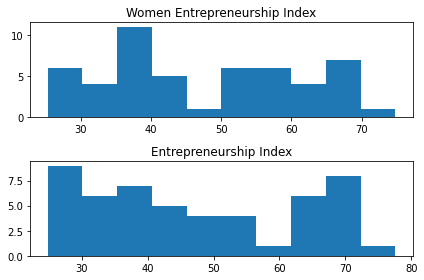

In [ ]:
# plot
plt.subplots(2,1)
plt.subplot(2,1,1)
plt.hist(data['Women Entrepreneurship Index'],bins=10)
plt.title('Women Entrepreneurship Index')
plt.subplot(2,1,2)
plt.hist(data['Entrepreneurship Index'],bins=10)
plt.title('Entrepreneurship Index')
plt.tight_layout()

In [ ]:
#Shapiro-Wilk test for Women Entrepreneurship Index
st.shapiro(data['Women Entrepreneurship Index'])

(0.9407680034637451, 0.013185255229473114)

In [ ]:
#Shapiro-Wilk test for Entrepreneurship Index
st.shapiro(data['Entrepreneurship Index'])

(0.9100407361984253, 0.0009260835940949619)

* The distribution of both variables is not normal as the p-value for Shapiro-Wilk test is <0.05,   

#### Equal variance tests

Levene's test: 
  * H0: groups have equal variance.     
  * H1: variance is unequal between the groups. 

In [ ]:
# Levene's test for Women Entrepreneurship Index
st.levene(data['Women Entrepreneurship Index'][data['European Union Membership']=='Member'], 
          data['Women Entrepreneurship Index'][data['European Union Membership']=='Not Member'],
          center='median')

LeveneResult(statistic=1.6156309727256064, pvalue=0.20970316875798875)

The variance of Women Entrepreneurship Index in European Union members and non-members are equal, as p-value is >0.05. 

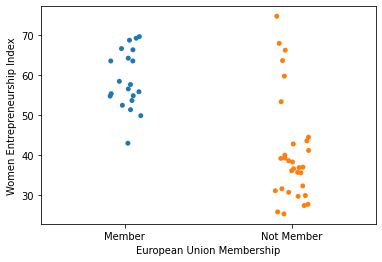

In [ ]:
# plot
sns.stripplot(data=data,x='European Union Membership',y='Women Entrepreneurship Index')

In [ ]:
# Levene's test for Entrepreneurship Index
st.levene(data['Entrepreneurship Index'][data['European Union Membership']=='Member'], 
          data['Entrepreneurship Index'][data['European Union Membership']=='Not Member'],
          center='median')

LeveneResult(statistic=0.5931091014705794, pvalue=0.4449165957267862)

The variance of Entrepreneurship Index in European Union members and non-members are equal as the p-value is <0.05. 

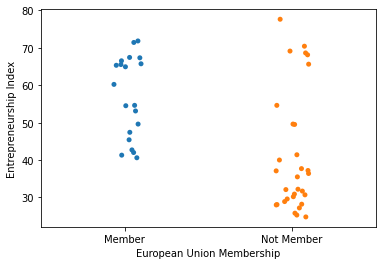

In [ ]:
# plot
sns.stripplot(data=data,x='European Union Membership',y='Entrepreneurship Index')

Although the variances are equal, Women Entrepreneurship Index and Entrepreneurship Index do not have normal distribution. Therefore a non-parametric version of t-test i.e, Mann-Whitney U test will be used.

#### Mann-Whitney U Test

In [ ]:
# Mann-Whitney U Test for Women Entrepreneurship Index
st.mannwhitneyu(data['Women Entrepreneurship Index'][data['European Union Membership']=='Member'], 
          data['Women Entrepreneurship Index'][data['European Union Membership']=='Not Member'],)

MannwhitneyuResult(statistic=84.0, pvalue=6.788175847129778e-06)

The Women Entrepreneurship Index of European Union members are not equal to non-members, as p-value is <0.05. 

Text(0.5, 1.0, 'Women Entrepreneurship Index in European Union Members and Non-Members')

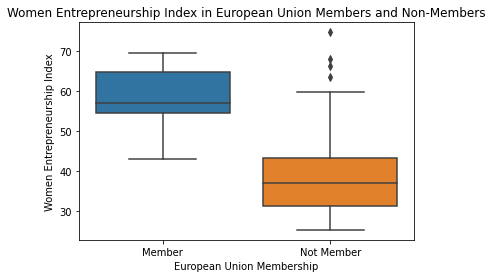

In [ ]:
# plot
weifig = sns.boxplot(data=data,x='European Union Membership',y='Women Entrepreneurship Index')
weifig.set_title('Women Entrepreneurship Index in European Union Members and Non-Members')

In [ ]:
# Mann-Whitney U Test for Entrepreneurship Index
st.mannwhitneyu(data['Entrepreneurship Index'][data['European Union Membership']=='Member'], 
          data['Entrepreneurship Index'][data['European Union Membership']=='Not Member'],)

MannwhitneyuResult(statistic=130.0, pvalue=0.00026689859185162853)

The Entrepreneurship Index of European Union members are not equal to non-members, as p-value is <0.05. 

Text(0.5, 1.0, 'Entrepreneurship Index in European Union Members and Non-Members')

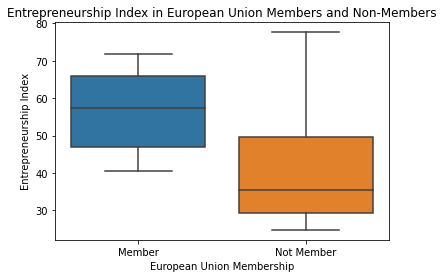

In [ ]:
# plot
eifig = sns.boxplot(data=data,x='European Union Membership',y='Entrepreneurship Index')
eifig.set_title('Entrepreneurship Index in European Union Members and Non-Members')

### Question 3

Is there a statistically significant relationship between Women's Entrepreneurship Index and Global Entrepreneurship Index values?

* H0: There is no correlation between Women's Entrepreneurship Index and Global Entrepreneurship Index
* H1: There is correlation between Women's Entrepreneurship Index and Global Entrepreneurship Index

As the variables are not normally distributed, non-parametric correlation test such as Spearman or Kendall should be used instead of Pearson. 

In [ ]:
# Spearman test 
st.spearmanr(data[['Women Entrepreneurship Index','Entrepreneurship Index']])

SpearmanrResult(correlation=0.907753920181673, pvalue=4.063302480431442e-20)

* There is a stastically significant correlation between Women Entrepreneurship Index and Entrepreneurship Index, as p-value is <0.05. 
* The correlation value is 0.91, indicating a strong positive correlation between the two variables.

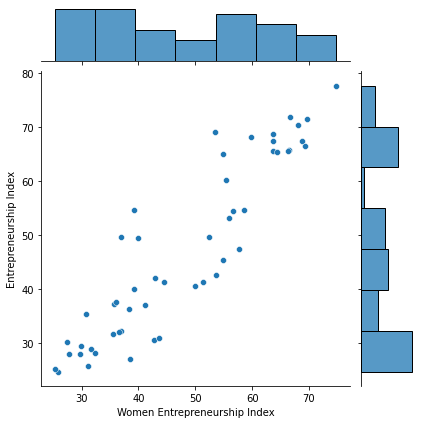

In [ ]:
# plot
sns.jointplot(data=data,x='Women Entrepreneurship Index',y='Entrepreneurship Index')